<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab04_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X2 = X[:,:2]

In [ ]:
y2 = y.copy()

In [ ]:
y2[(y2==2)] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

0.9904761904761905 1.0


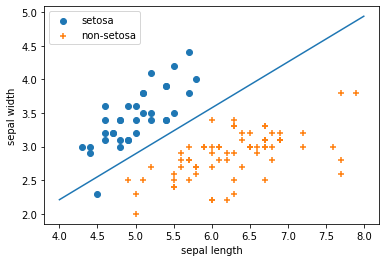

In [ ]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

markers = ['o','+']

for i in range(2):
    xs = X_train[:,0][y_train == i]
    ys = X_train[:,1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(['setosa','non-setosa'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

clf.coef_, clf.intercept_
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
b = clf.intercept_

xx = np.linspace(4, 8, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)

# use all classes

0.7523809523809524 0.7555555555555555
[[-108.74475637  144.56276218]
 [  12.53314052  -80.50132562]
 [  51.88679245  -27.95248078]] [  74.17373957  118.51762316 -252.67961901]


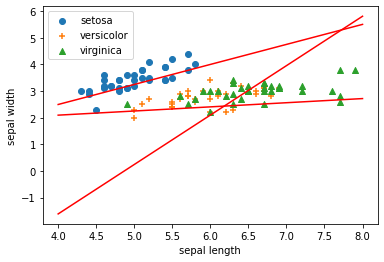

In [ ]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

markers = ['o','+', '^']

for i in range(3):
    xs = X_train[:,0][y_train == i]
    ys = X_train[:,1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

print(clf.coef_, clf.intercept_)

for i in range(3):
    w1 = clf.coef_[i, 0]
    w2 = clf.coef_[i, 1]
    b = clf.intercept_[i]
    xx = np.linspace(4, 8, 100)
    yy = -w1/w2 * xx - b/w2
    plt.plot(xx, yy, c='r')


### contour

(61600,)
(220, 280)


[]

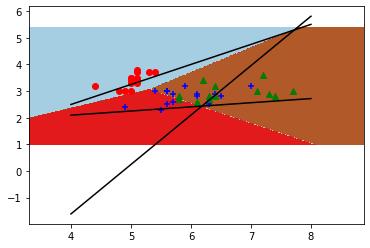

In [ ]:
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # column 으로 붙이기
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
# plt.contourf(xx, yy, Z)      # Z: height values over which the contour is drawn
# plt.axis('tight')
#-----------------------

markers = ['o', '+', '^']
colors = "rbg"

for i in range(3):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i], c=colors[i])
   
for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,8,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='k')

plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  6, 10],
       [ 0,  1, 13]])

# SVC - SVM classifier

In [ ]:
from sklearn.svm import SVC
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [ ]:
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_clf.score(X_test, y_test)

0.8222222222222222

In [ ]:
y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  3],
       [ 0,  5,  9]])

In [ ]:
svm_clf.coef_, svm_clf.intercept_

(array([[-1.85221229,  2.11681425],
        [-2.12801373,  1.70240867],
        [-1.50477337, -0.86059401]]),
 array([ 3.51371556,  6.66063643, 11.92210985]))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=100,
                                  probability=True))
ovr_clf.fit(X_train, y_train)
ovr_clf.score(X_train, y_train), ovr_clf.score(X_test, y_test)

(0.9238095238095239, 0.6888888888888889)

## Various C and gamma values for SVM

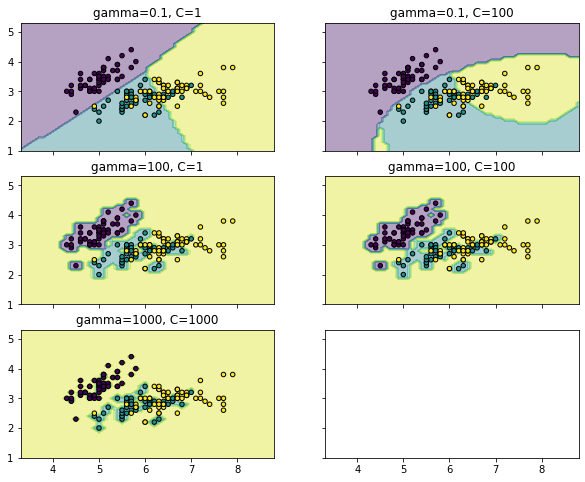

(0.82, 0.82, 0.92, 0.9266666666666666, 0.9266666666666666)

In [25]:
from itertools import product
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 확인
clf1.score(X, y), clf2.score(X, y), clf3.score(X, y), clf4.score(X, y), clf5.score(X,y)

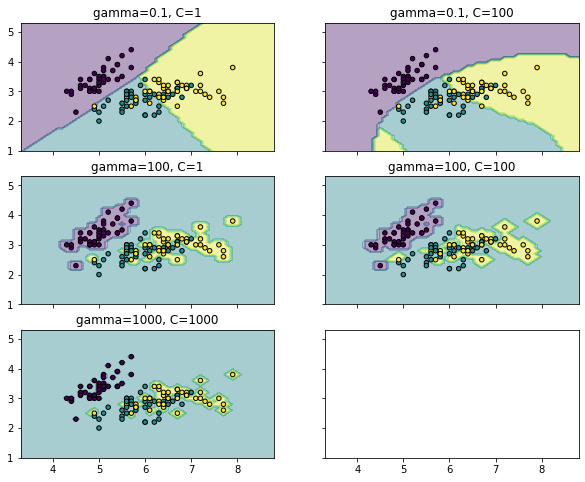

0.8416666666666667 0.8166666666666667 0.9416666666666667 0.95 0.95


In [28]:
# for train and test data
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_train, y_train), 
       clf2.score(X_train, y_train),
       clf3.score(X_train, y_train),
       clf4.score(X_train, y_train),
       clf5.score(X_train, y_train))

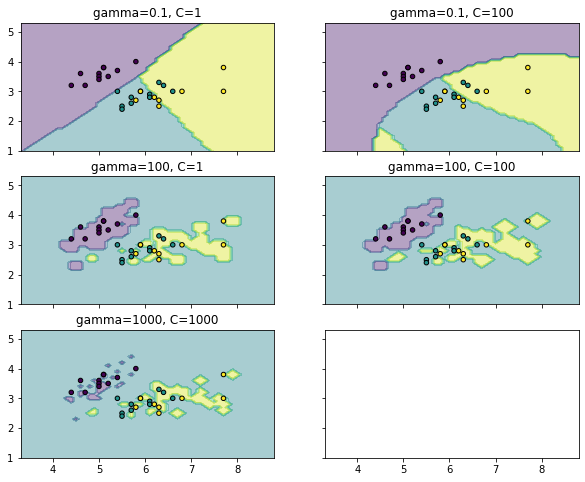

0.7333333333333333 0.7333333333333333 0.6333333333333333 0.6666666666666666 0.5333333333333333


In [29]:
# for test data
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_test, y_test), 
       clf2.score(X_test, y_test),
       clf3.score(X_test, y_test),
       clf4.score(X_test, y_test),
       clf5.score(X_test, y_test))